In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def motion_blur(image, kernel_size, direction):
    kernel = np.zeros((kernel_size, kernel_size))
    if direction == 'horizontal':
        kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    elif direction == 'vertical':
        kernel[:, int((kernel_size - 1) / 2)] = np.ones(kernel_size)
    else:
        raise ValueError("direction must be 'horizontal' or 'vertical'")
    kernel = kernel / kernel_size
    return cv2.filter2D(image, -1, kernel)

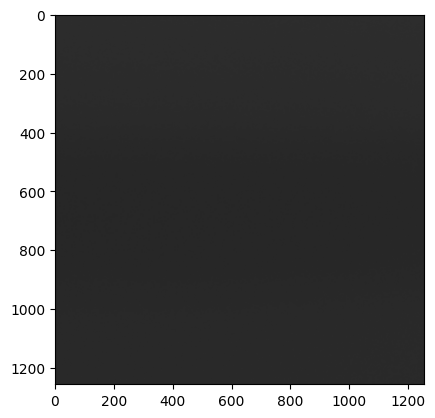

In [3]:
src = cv2.imread("/home/VirtualFlaw/Data/Raw_jpg/New/22E023-05-001-1st-1-(1)-4.jpg")
#90도 회전
plt.imshow(src, cmap='gray')
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src = motion_blur(src, 15, 'horizontal')
src = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
src = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
src = cv2.resize(src, (512, 512))


(1, 512)
111 346


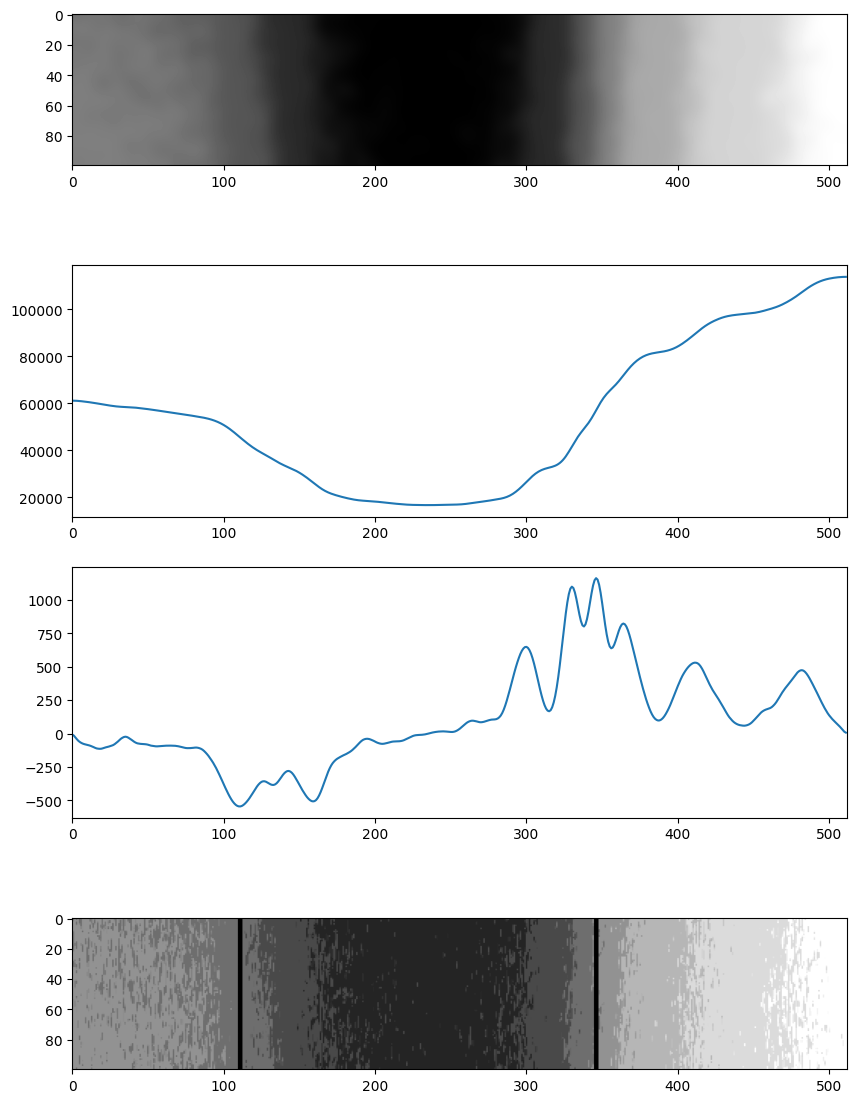

In [5]:
src_ = src.copy()
plt.figure(figsize=(10,15))
src_ = np.array(src_, dtype=np.float32)
src_ = cv2.GaussianBlur(src_, (31,31), 0)
plt.subplot(4,1,1)
plt.xlim(0, 512)
plt.imshow(src_[300:400, :], cmap='gray')
for i in range(9):
    #x축을 기준으로 이미지 2개로 분할
    src_ = np.split(src_, 2, axis=0)
    src_ = np.add(src_[0], src_[1])

print(src_.shape)
#차원 축소
src_ = np.squeeze(src_)
plt.subplot(4,1,2)
plt.xlim(0, 512)
plt.plot(src_)
#기울기가 급격하게 변하는 부분을 찾아내기 위해 1차 미분
src_ = np.gradient(src_)
plt.subplot(4,1,3)
plt.xlim(0, 512)
plt.plot(src_)
#위의 값에서 가장 작은값과 큰값의 index를 찾아내기
min_index = np.argmin(src_)
max_index = np.argmax(src_)
print(min_index, max_index)


src_line = src.copy()
cv2.line(src_line, (min_index, 0), (min_index, 512), (0,255,0), 2)
cv2.line(src_line, (max_index, 0), (max_index, 512), (0,255,0), 2)
#90도 역회전
plt.subplot(4,1,4)
plt.xlim(0, 512)
plt.imshow(src_line[300:400, :], cmap='gray')
src_line = cv2.rotate(src_line, cv2.ROTATE_90_COUNTERCLOCKWISE)



#1/3만 출력

